<a href="https://colab.research.google.com/github/NSMovin/self_assessment_small_project/blob/main/self_assessment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data-Driven Self-Assessment:
###Readiness for Artificial Intelligence & Data Science (ADS) Degree at Green University of Bangladesh



---


Author: Naeem Shovon Shuvro
Date: 23/10/2025


---


Problem/ Objective:
Evaluate Naeem Shovon Shuvro's current readiness for ADS degree and
identify areas for improvement






# Self-Assessment Mini Project
### "Why I'm not a bad fit for the Artificial intelligence and data science program"

#####Introduction
Dear Dr. Muhammad Abul Hasan,

I'm escited to share this short, data-driven self-assessment I built to explore "Why pursuing ADS program is the path for me". Instead of simply describing my strengths, I decided to appreach this reflection by analyzing my own profile using clustering, visualization and improvement analytics.


(N.B- The profiles in the dataset are made up reason being not having any real data regarding this topic but scores on my profile are my honest opinions. As it is on of my first few project there will be alot of mistakes and I tried to explain which topics I know but don't understand how it works under the hood)

The goal of this mini -project is to:
  1. Assess my skills arcross key areas
  2. Use unsupervised learning (KMeans clustering ) to see how my      profileis compared to an "Ideal Cadidate".
  3. Identify my strength and weaknesses.
  4. Demonstrate any anlytical thinking and motivate to grow through data.

By turning self-reflection into a simple machine learning problem, I wanted to show not just my enthusiasm for this field but also my mindset on analytical thinking and problem solving.

### Importing required packages

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
!pip install adjustText
from adjustText import adjust_text

### Importing Dataset
Importing the GUB_students_self_assessment_scores csv file with pandas and making a Pnadas DataFrame.Setting the profile column as index.


In [319]:
data = pd.read_csv('GUB_students_self_assessment_scores.csv')
data.head()

,Profile,Math Skills,Programming Basics,Python Skills,English Communication,Basic ML Knowledge,Analytic Thinking,Confidence,Teamwork,Financial Readiness,Time Management,Creativity
0,Ideal Candidate,9,9,9,8,9,9,8,9,8,9,8
1,Strong Candidate,8,7,8,7,6,8,7,7,7,8,7
2,Developing but Promising,7,5,6,7,5,7,6,7,6,6,7
3,Need Support,5,3,4,6,3,5,4,5,5,4,4
4,Naeem Shovon Shuvro,7,7,7,8,5,8,3,5,8,6,8


In [320]:
df = pd.DataFrame(data)
df.set_index('Profile', inplace=True)
df.head()

,Math Skills,Programming Basics,Python Skills,English Communication,Basic ML Knowledge,Analytic Thinking,Confidence,Teamwork,Financial Readiness,Time Management,Creativity
Profile,,,,,,,,,,,
Ideal Candidate,9,9,9,8,9,9,8,9,8,9,8
Strong Candidate,8,7,8,7,6,8,7,7,7,8,7
Developing but Promising,7,5,6,7,5,7,6,7,6,6,7
Need Support,5,3,4,6,3,5,4,5,5,4,4
Naeem Shovon Shuvro,7,7,7,8,5,8,3,5,8,6,8


### Exploratory Data Analysis

In [321]:
df.shape

(5, 11)

This is a small dataset, It has 5 rows and 11 columns or features.

In [322]:
features = df.columns
features

Index(['Math Skills', 'Programming Basics', 'Python Skills',
       'English Communication', 'Basic ML Knowledge', 'Analytic Thinking',
       'Confidence', 'Teamwork', 'Financial Readiness', 'Time Management',
       'Creativity'],
      dtype='object')

In [323]:
df.duplicated().sum()

np.int64(0)

The dataset doesn't have any duplicate rows.

In [324]:
df.describe()

,Math Skills,Programming Basics,Python Skills,English Communication,Basic ML Knowledge,Analytic Thinking,Confidence,Teamwork,Financial Readiness,Time Management,Creativity
count,5.00000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000
mean,7.20000,6.200000,6.800000,7.20000,5.60000,7.400000,5.600000,6.60000,6.80000,6.600000,6.800000
std,1.48324,2.280351,1.923538,0.83666,2.19089,1.516575,2.073644,1.67332,1.30384,1.949359,1.643168
min,5.00000,3.000000,4.000000,6.00000,3.00000,5.000000,3.000000,5.00000,5.00000,4.000000,4.000000
25%,7.00000,5.000000,6.000000,7.00000,5.00000,7.000000,4.000000,5.00000,6.00000,6.000000,7.000000
50%,7.00000,7.000000,7.000000,7.00000,5.00000,8.000000,6.000000,7.00000,7.00000,6.000000,7.000000
75%,8.00000,7.000000,8.000000,8.00000,6.00000,8.000000,7.000000,7.00000,8.00000,8.000000,8.000000
max,9.00000,9.000000,9.000000,8.00000,9.00000,9.000000,8.000000,9.00000,8.00000,9.000000,8.000000


Here we can get a quick overview of statistics of the dataset.
Count of the profiles 5
Minimum scores in each skill
Standard Deviation of scores for each skill
Maximus scores on each skill is 8-9

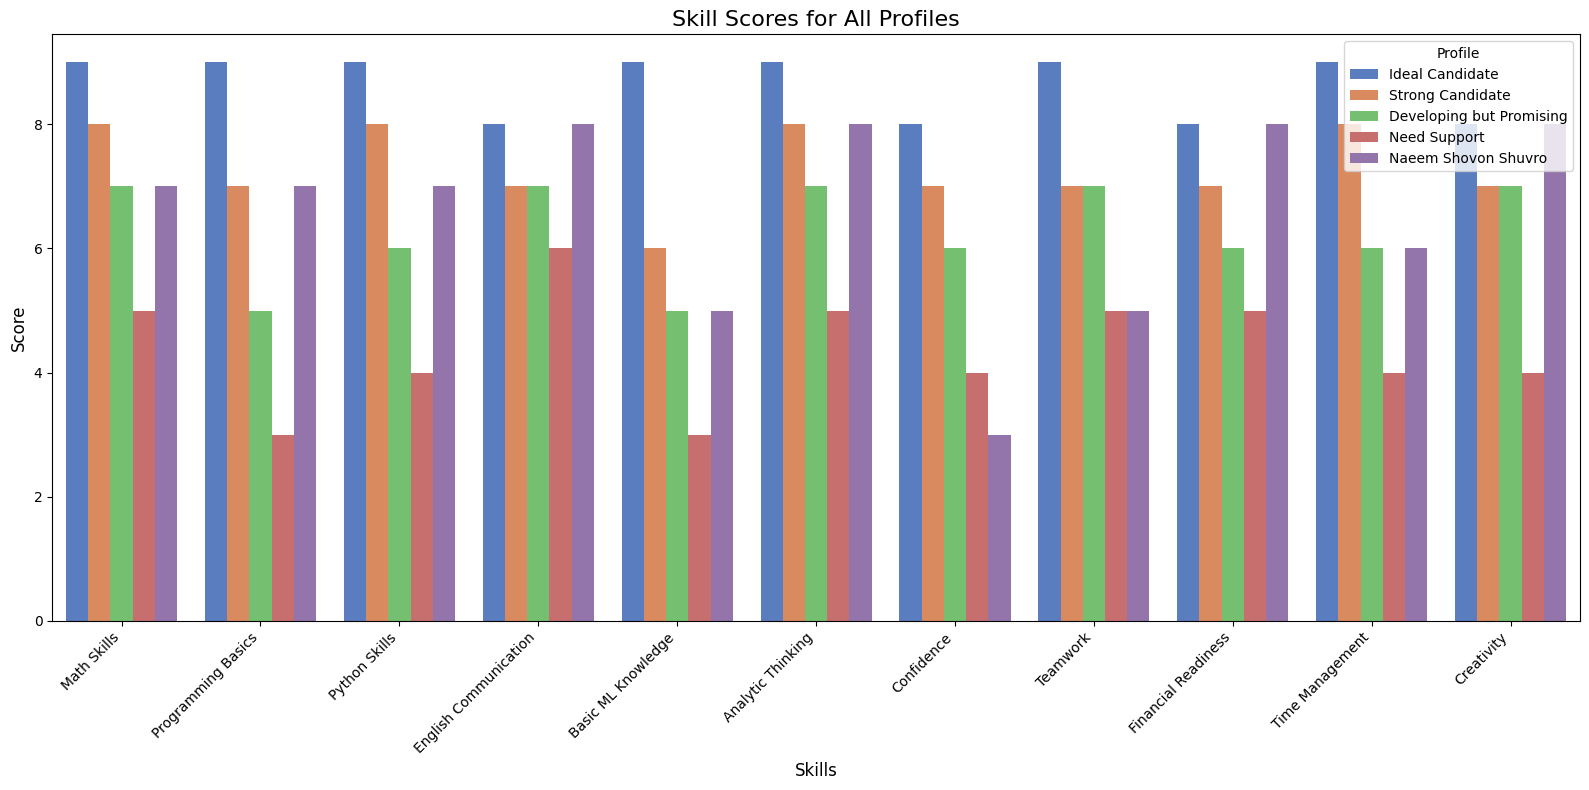

In [325]:
# Reset index to use 'Profile' as a column for melting
df_melted = df.reset_index().melt('Profile', var_name='Skill', value_name='Score')

plt.figure(figsize=(16, 8))
sns.barplot(x='Skill', y='Score', hue='Profile', data=df_melted, palette='muted')
plt.title('Skill Scores for All Profiles', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Profile')
plt.tight_layout()
plt.show()

From this above clustered bar chart we can see:
1. Different profile score on different skills.
2. Ideal Candidate has higher scores in every skill than others.
3. Need Support profile has the lowest scores on every skill.
4. Naeem Shovon Shuvro's scroes are in between Ideal Candidate and Need Support profile's score except for "Confidence"!.

EDA Conclusion:
1. The dataset has very small sample size.
2. The dataset is clean no duplicates, 5 rows and 11 columns
3. As Naeem Shovon Shuvro's assesment is in the dataset with assessment of "Ideal Candidate", "Strong Candidate", "Developing but Promising" and "Need Support" we can use a Clustering algorithm like KMeans to answer the problem statement.

### Standardization, Clustering and Visualizing the findings

In [326]:
# Standardization the data
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Standardize the features to prevent KMeans bias towards a feature

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # n_clusters for number of cluster and random_state for reproducibility
clusters = kmeans.fit_predict(X_scaled)            # TODO: have to do some validation to find optimal cluster number
                                                      # NeedToKnow: How will the validation effect this small dataset?
df['Cluster'] = clusters

print("Cluster assigment for each profile:\n")
print(df[['Cluster']])

Cluster assigment for each profile:

                          Cluster
Profile                          
Ideal Candidate                 2
Strong Candidate                0
Developing but Promising        0
Need Support                    1
Naeem Shovon Shuvro             0


First we standardized the features makes the mean 0 and std 1 for each feature to prevent KMeans bias towards any feature. StandardScaler = (feature value - mean value ) / standard deviation.

Then we used KMeans(*TODO:tho I get how it works,need to understand more about how it works under the hood*) an unsupervised learning algorithm for clustering similar type of profiles.Cluster 2 represents Ideal Candidates Cluster 1 represents Need Support profiles.

.fit() - it learns parameters from data.

.transform() - applies the parameters and transform data

.fit_transform() - does both.





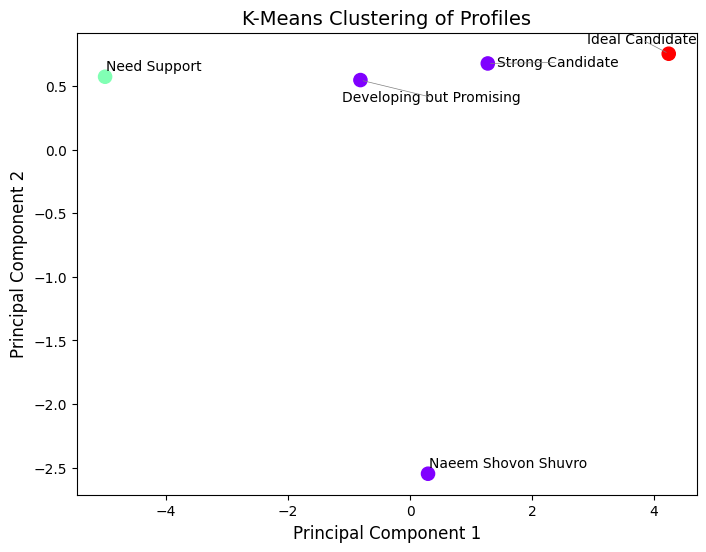

In [327]:
# Visualize the CLusters in 2d Space using Principal Component Analysis(PCA)
# TODO why we used PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='rainbow', s=90)

texts = []
for i, profile in enumerate(df.index):
  texts.append(plt.text(reduced[i,0], reduced[i,1], profile, fontsize=10, color='black', ha='left', va='bottom'))

adjust_text(texts, force_points=(0.2, 0.2), force_text=(0.2, 0.6), arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("K-Means Clustering of Profiles", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.show()

### Cluster Validation with inertia and silhouette

Cluster Validation:

Inertia: 9.79
Silhouette Score: 0.15
Silhouette Score Quality: Poor


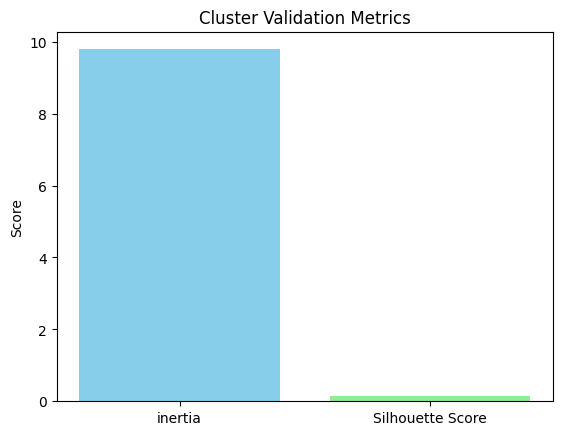

In [328]:
# cluster validation
inertia = kmeans.inertia_
silhouette = silhouette_score(X_scaled, clusters)

print(f"Cluster Validation:\n")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


if silhouette > 0.5:
  quality = "Good"
elif silhouette > 0.25:
  quality = "Moderate"
else:
  quality = "Poor"


print(f"Silhouette Score Quality: {quality}")


metrics = {"inertia": inertia, "Silhouette Score": silhouette}
plt.bar(metrics.keys(), metrics.values(), color=["skyblue", "lightgreen"])
plt.ylabel("Score")
plt.title("Cluster Validation Metrics")
plt.show()

### Cluster Validation
in KMeans unsupervised learning there is no label to predict we cant evaluate error matrics we can evaluate how well separated are the clusters and determine the optimal cluster number from getting the best validation score.

Inertia - Lower is better shows how tightly grouped the points are
Silhouette - -1 t +1 and closer to +1 is better. Distict clusters from each other

(N.B- I could't find a good validation score for this made up small dataset. Need to learn more about validation for unsupervised learning. I know know about Inertia and Silhouetter TODO: learn about more validation techniques)

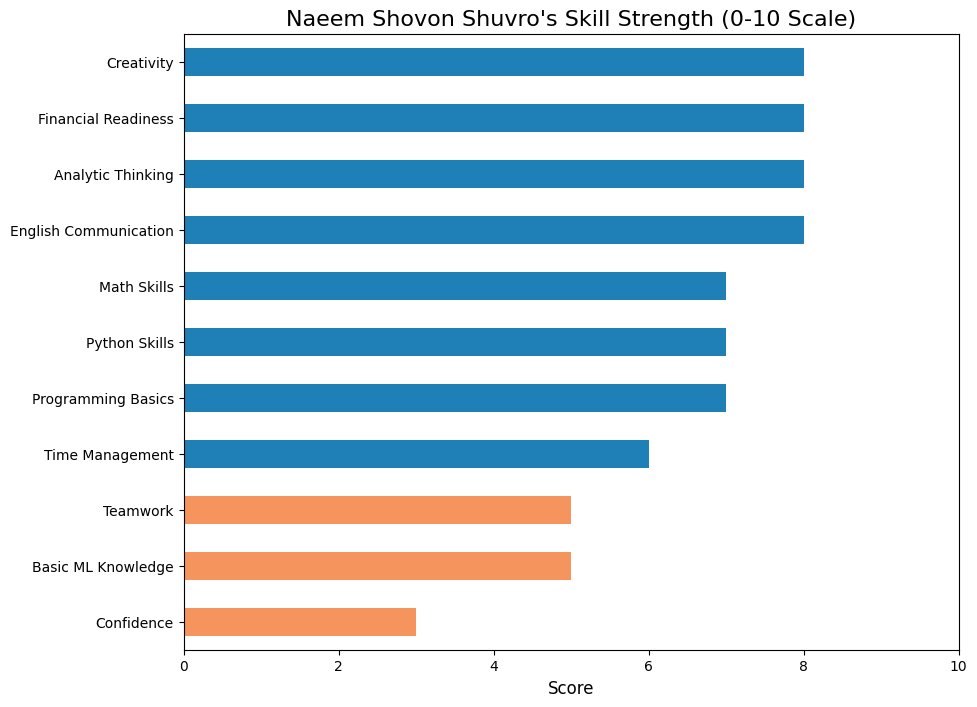

In [329]:
# Visualizing Skill strength for Naeem Shovon Shuvro

my_profile = df.loc['Naeem Shovon Shuvro'].drop('Cluster') # Exclude 'Cluster' from the plot


plt.figure(figsize=(10,8))


# Create a list of colors based on the skill strength
colors = ['#f5945c' if score < 6 else '#1f80b7' for score in my_profile.sort_values(ascending=True)]


my_profile.sort_values(ascending=True).plot(kind="barh", color=colors)
plt.title("Naeem Shovon Shuvro's Skill Strength (0-10 Scale)", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.xlim(0,10)
plt.show()

From this horizonatal bar chart we can see:
1. Basic ML Knowledge (5), Teamwork (5), Confidence (3) highlighted in orange are the skills I feel less strong (below 6).

2. Skills where I feel more confident (above or equal to 6), highlighted in blue:  Math Skills (7), Programming Basics (7), Python Skills (7), English Communication (8), Analytic Thinking (8), Financial Readiness (8), and Creativity (8).

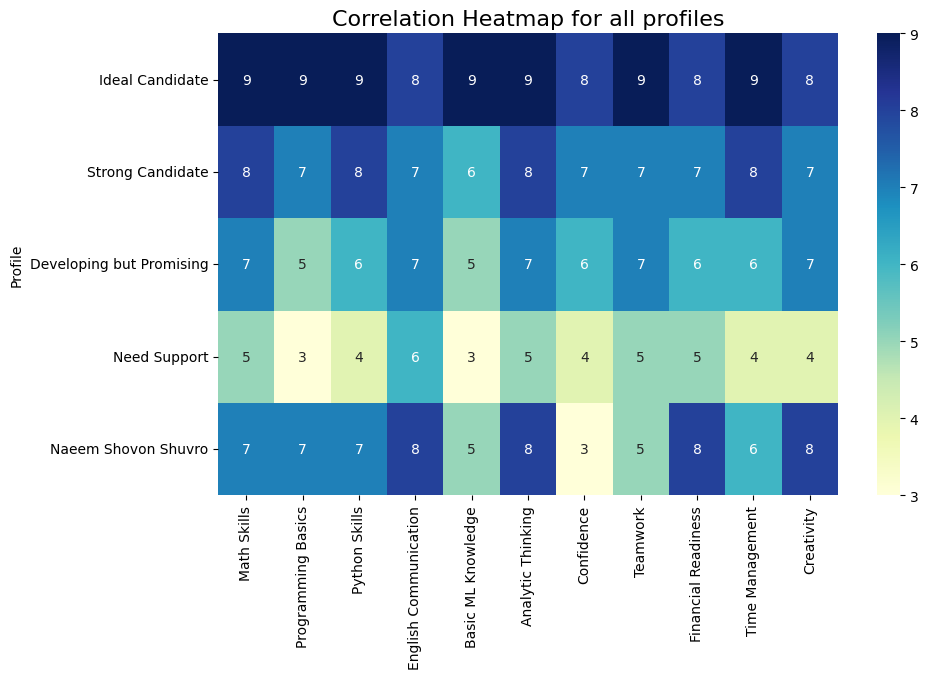

In [330]:
# heatmap for all profiles
plt.figure(figsize=(10,6))
sns.heatmap(df[features], annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Correlation Heatmap for all profiles", fontsize=16)
plt.show()

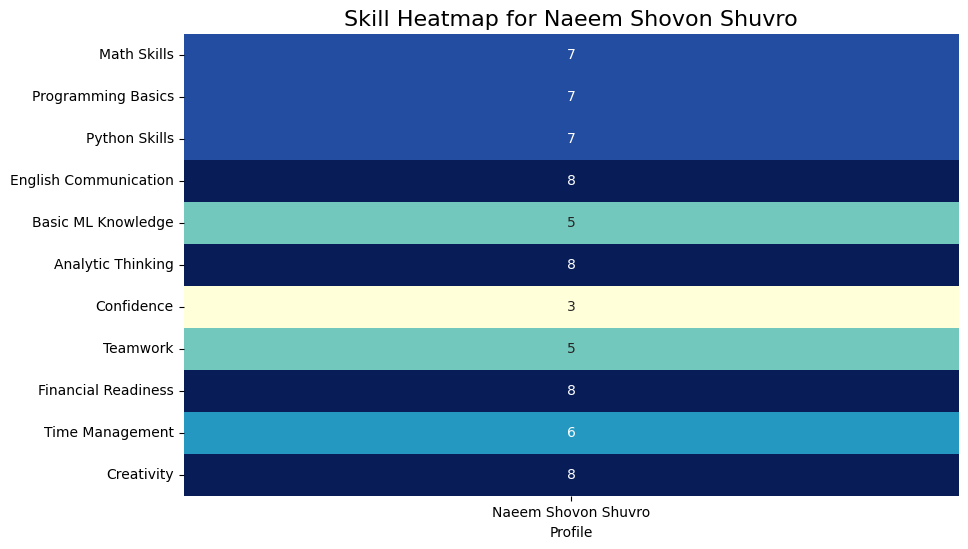

In [331]:
# heatmap for Naeem Shovon Shuvro's profile
plt.figure(figsize=(10, 6)) # Adjusted figure size for a single row
sns.heatmap(df.loc[['Naeem Shovon Shuvro'], features].T, annot=True, cmap="YlGnBu", fmt=".0f", cbar=False) # Transpose and don't show color bar for single row
plt.title("Skill Heatmap for Naeem Shovon Shuvro", fontsize=16)
plt.yticks(rotation=0) # Keep skill names horizontal
plt.show()

 the first heatmap helps understand the relationships between skills in general within this group of profiles, while the second heatmap provides a concise visual overview of Naeem Shovon Shuvro's personal skill profile.

 Color intensity represents scores for each skills. Darker the color higher the score and ligher the color lower the score.

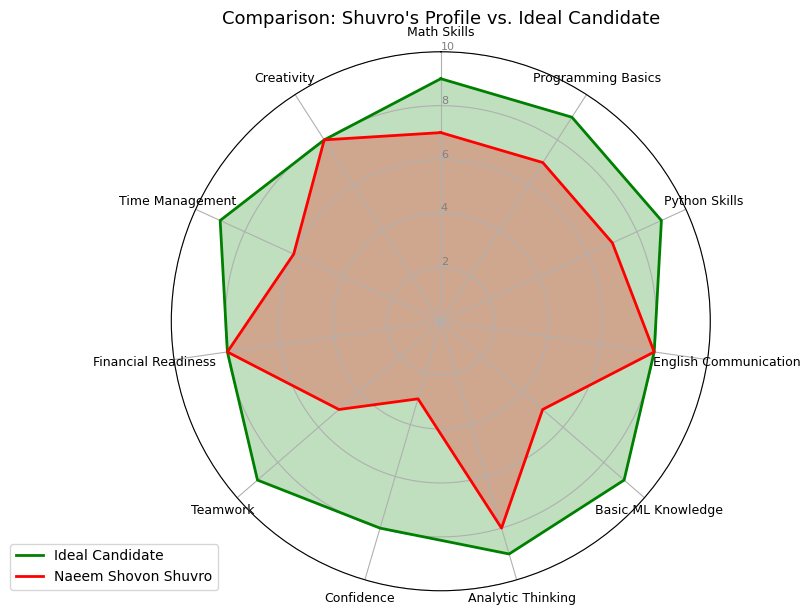

In [332]:
# Radar Chart - Comparing "Naeem Shovon Shuvro"'s profile vs. "Ideal Candidate"

labels = features
num_vars = len(labels)

# values for radar charts
ideal = df.loc["Ideal Candidate", features].values.tolist()
mine = df.loc["Naeem Shovon Shuvro", features].values.tolist()

# first value to close the circle
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
ideal += ideal[:1]
mine += mine[:1]
angles += angles[:1]

# creating radar chart
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
ax.plot(angles, ideal, color="green", linewidth=2, label="Ideal Candidate")
ax.fill(angles, ideal, color="green", alpha=0.25)

ax.plot(angles, mine, color="red", linewidth=2, label="Naeem Shovon Shuvro")
ax.fill(angles, mine, color="red", alpha=0.25)

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], labels, fontsize=9)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10], ["2", "4", "6", "8", "10"], color="gray", size=8)
plt.ylim(0,10)
plt.title("Comparison: Shuvro's Profile vs. Ideal Candidate", size=13, pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.show()















From the radar chart above we can see:
1. **Shapes**: The green area is the shape of "Ideal Candidate" profile and is the benchmark for each skills. My profile's shape is the red area.

2. **Area of strength relative to benchmark:** English Communication, Financial Readiness, Anatylic Thinking, Creativity skills are close or match to Ideal Candidate.Math Skills, Programming Basics and Python skills are reasonably closer to the benchmark.

3. **Area of Improvement:** Basic ML knowledge, Confidence, Teamwork and Time Management shows a noticable gap between "Ideal Candidate"'s skills.

(N.B- My visualization skills is not great I got some help from google colab gemini.TODO: more practice with matplotlib, sns, plotly)

In [333]:
# Interpreting the Results
my_cluster = int(df.loc["Naeem Shovon Shuvro", "Cluster"])
print(f"Based on K-Means clustering, Naeem Shovon Shuvro belongs to Cluster {my_cluster}.")

# Rough interpretation of the clusters
cluster_summary = df.groupby("Cluster").mean()
display(cluster_summary.round(2))

print("\n Interpretations:")
print("- Cluster 0: Strong Candidate")
print("- Cluster 1: Need Support")
print("- Cluster 2: Ideal Canditate")

print(f"\n My self-assessment suggests I am in the '{['Strong Candidate', 'Developing but Promising', 'Needs Support'][my_cluster]}'group.")

Based on K-Means clustering, Naeem Shovon Shuvro belongs to Cluster 0.


,Math Skills,Programming Basics,Python Skills,English Communication,Basic ML Knowledge,Analytic Thinking,Confidence,Teamwork,Financial Readiness,Time Management,Creativity
Cluster,,,,,,,,,,,
0,7.33,6.33,7.0,7.33,5.33,7.67,5.33,6.33,7.0,6.67,7.33
1,5.00,3.00,4.0,6.00,3.00,5.00,4.00,5.00,5.0,4.00,4.00
2,9.00,9.00,9.0,8.00,9.00,9.00,8.00,9.00,8.0,9.00,8.00



 Interpretations:
- Cluster 0: Strong Candidate
- Cluster 1: Need Support
- Cluster 2: Ideal Canditate

 My self-assessment suggests I am in the 'Strong Candidate'group.


In [334]:
# Generating Improvement Plans

threshold = 7
weak_area = my_profile[my_profile < threshold]


suggestions = {
    "Math Skills": "Strengthen through statistics and linear algebra exercises.",
    "Programming Basics": "Practice Python, pandas, and data visualization regularly.",
    "Python Skills": "Take a intro to Python free course from online",
    "English Communication": "Engage in more writing and presentations to enhance clarity.",
    "Basic ML Knowledge": "Take an online introduction to ML course.",
    "Analytic Thinking": "Solve logical puzzles and participate in data competitions.",
    "Confidence": "Build confidence through talking to people more —share your personal ML projects and receive mentorship from someone.",
    "Teamwork": "Join groups and do some projects together.",
    "Financial Readiness": "Explore scholarships, assistantships, or online freelance work.",
    "Time Management": "Adopt scheduling tools for personal project planning, cover the long traveling time from home to campus by utilizing the free time in between classes.",
    "Creativity": "Engage in cross-disciplinary problem solving or visualization design challenges."
}

improvement_plan = pd.DataFrame({
    "Skill": weak_area.index,
    "Score": weak_area.values,
    "Suggested Action": [suggestions[s] for s in weak_area.index],
})

print("Suggested Improvement Plan :")
display(improvement_plan)

Suggested Improvement Plan :


,Skill,Score,Suggested Action
0,Basic ML Knowledge,5,Take an online introduction to ML course.
1,Confidence,3,Build confidence through talking to people mor...
2,Teamwork,5,Join groups and do some projects together.
3,Time Management,6,Adopt scheduling tools for personal project pl...


## Reflection

This small project is my honest and data-informed view of where I stand and how I can imporve in my Machine learning and Data science journey.Also shows how ready I am to get into BSc in ADS program which will provide me improvements and mentorship I badly need if I'm allowed to get addited.


### Key Insights
- The Areas I'm most confident about are **Analytical Thinking**, **English Communication**, **Financial readiness** and **Creativity**
-My Developing Areas which will help me during the course are **Math Skills**, **Programming Basics** and **Python Skills**
-The areas I need a lot of help and mentorship are **Basic ML knowledge**, Time management, Team work and mostly Confidence.

### Why this department is the right fit
Studying in the " Department of Artifical Intelligence and Data Science" will help me:
- Deepen my technical understanding of ML, AI and Data analytics
-Apply theory through real-world projects and research initiatives
- Build confidence with teamwork, mentorshhip, and presentation opertunity
-Develop the mindset to turn complex data into something meaningful - not for jsut grades but for reaseach and impact.

### My improvement plan
THe improvement table above outlies the areas I need to focus more tho there is alot to learn from each areas and more new ones.If I get the oppertunity to admit I will have 2 months to prepare during that time:
- Take some beginner ML lectures from the free online resources.
- Make some small python projects.
- Try to end the "Hands-on machine learning with scikit learn, keras and tensorflow" book by Aurelean Geron and start Statistics for machine learning with R
-Strengthen my data visualization skills
-Improve confidence by discussing with others about your projects

## Closing Thoughts
This reflection is a glimps of how serioursly I am taking this oppertunity if given and how I am approaching learning and self-growth.
I believe that joining this program will give me the structure, mentorship, and the challenge to transform these insights into action,
and to grow into a capable, creative data scientist and human being.



In [336]:
"""
=============================================
"""
"""
=============================================
"""
"""
=============================================
"""
"""
=============================================
"""
"""
=============================================
"""

'\n=============================================\n'

#### Questions I asked myself during this project and tried to answer them from my little understanding on some topics(There are some unanswered questions need to solve those later)



#### Could I use any other learning algorithms to solve this problem?
=> There is no labels to predict things so the data is a unsupervised data. The problem is a clustering problem like finding similar groups perticularly which group "Naeem Shovon Shuvro" profile belongs to so no supervised learning algorithm for this.




#### Why KMeans? Could I use any other unsupervised algorithms?
=> Could probably use Hierarchical Clustering it would've showed dendrogram of similar profile. also Gausssian Mixture Models(GMM) it adds probability and will show how much similar to each group my scores are. Could've used all 3 algorithms and take the result from the best algorithm(??).TODO: Need to learn more about these algorithms and validation for next project.